In [10]:
from subpred.protein_go_datasets import get_transmembrane_transporter_dataset, get_stats, count_children

## Parameters

In [ ]:
ORGANISMS = [9606]  # athaliana 3702 yeast 559292 human 9606 ecoli 83333
GO_TERMS_CLASSES = [
    "calcium channel activity",
    "potassium channel activity",
]
IDENTITY_THRESHOLD = 70
TEST_NAME = "svc_human_calciumpotassium"
FEATURES_FOLDER = "../data/tmp_data/"  # to share between environments
RESULTS_FOLDER = "../data/results/"
RECALCULATE_RESULTS = False  # TODO If false, use cached results, e.g. to create more plots

## Full dataset

In [12]:
# Get full dataset for stats. Dataset for analysis is created in cell below.
dataset_unfiltered = get_transmembrane_transporter_dataset( 
    organism_ids=ORGANISMS,
    swissprot_only=False,
    datasets_path="../data/datasets/",
    exclude_iea_go_terms=False,
    max_sequence_evidence_code=2,
    remove_proteins_without_gene_names=False,
)
get_stats(*dataset_unfiltered)

cd-hit: clustered 3874 sequences into 1029 clusters at threshold 50
cd-hit: clustered 3874 sequences into 1347 clusters at threshold 70
cd-hit: clustered 3874 sequences into 1774 clusters at threshold 90
cd-hit: clustered 3874 sequences into 3408 clusters at threshold 100


n_transporters  \
swissprot_reviewed has_gene_name go_evidence   protein_existence_evidence clustering                   
False              False         computational protein_level              50                       1   
                                                                          70                       1   
                                                                          90                       5   
                                                                          100                      9   
                                                                          None                    10   
                                               transcript_level           50                      54   
                                                                          70                      77   
                                                                          90                     152   
                                                                          100                    665   
                                                                          None                   771   
                                 experiment    transcript_level           50                       1   
                                                                          70                       1   
                                                                          90                       1   
                                                                          100                      2   
                                                                          None                     2   
                   True          computational protein_level              50                     142   
                                                                          70                     211   
                                                                          90                     419   
                                                                          100                   1031   
                                                                          None                  1175   
                                               transcript_level           50                      31   
                                                                          70                      46   
                                                                          90                     100   
                                                                          100                    501   
                                                                          None                   687   
                                 experiment    transcript_level           50                       1   
                                                                          70                       1   
                                                                          90                       2   
                                                                          100                      4   
                                                                          None                     5   
True               True          computational protein_level              50                     552   
                                                                          70                     741   
                                                                          90                     819   
                                                                          100                    919   
                                                                          None                   945   
                                               transcript_level           50                       6   
                                                                          70                      10   
                              

## Filtered Subset

In [13]:
dataset_organism = get_transmembrane_transporter_dataset(  # organism
    organism_ids=ORGANISMS,
    swissprot_only=True,
    datasets_path="../data/datasets/",
    exclude_iea_go_terms=True,
    max_sequence_evidence_code=1,
    remove_proteins_without_gene_names=True,
)
get_stats(*dataset_organism)

cd-hit: clustered 1121 sequences into 846 clusters at threshold 50
cd-hit: clustered 1121 sequences into 1039 clusters at threshold 70
cd-hit: clustered 1121 sequences into 1110 clusters at threshold 90
cd-hit: clustered 1121 sequences into 1118 clusters at threshold 100


n_transporters  \
swissprot_reviewed has_gene_name go_evidence protein_existence_evidence clustering                   
True               True          experiment  protein_level              50                     846   
                                                                        70                    1039   
                                                                        90                    1110   
                                                                        100                   1118   
                                                                        None                  1121   

                                                                                    n_terms  
swissprot_reviewed has_gene_name go_evidence protein_existence_evidence clustering           
True               True          experiment  protein_level              50              534  
                                                                        70              563  
                                                                        90              570  
                                                                        100             570  
                                                                        None            570

In [14]:
display(count_children(dataset_organism=dataset_organism, go_term="monoatomic anion channel activity"))
count_children(dataset_organism=dataset_organism, go_term="monoatomic cation channel activity")

,Uniprot
go_term_ancestor,
monoatomic anion channel activity,89
chloride channel activity,72
ligand-gated monoatomic anion channel activity,42
voltage-gated monoatomic anion channel activity,17
volume-sensitive anion channel activity,8
iodide channel activity,1
fluoride channel activity,1


,Uniprot
go_term_ancestor,
monoatomic cation channel activity,289
ligand-gated monoatomic cation channel activity,129
voltage-gated monoatomic cation channel activity,115
calcium channel activity,105
potassium channel activity,100
sodium channel activity,46
proton channel activity,13
mechanosensitive monoatomic cation channel activity,8
osmolarity-sensing monoatomic cation channel activity,4


## Subset

In [15]:
from subpred.dataset_filters import get_classification_subset
dataset_organism = get_classification_subset(dataset_full=dataset_organism, go_terms=GO_TERMS_CLASSES, remove_duplicates=True)

print("before clustering:")
dataset_organism[1].go_term_ancestor.value_counts()

before clustering:


go_term_ancestor
calcium channel activity      104
potassium channel activity     96
Name: count, dtype: int64

In [16]:
from subpred.dataset_filters import filter_no_3Di_available

dataset_organism = filter_no_3Di_available(dataset_organism)
dataset_organism[1].go_term_ancestor.value_counts()

go_term_ancestor
calcium channel activity      103
potassium channel activity     95
Name: count, dtype: int64

Clustering at 70%

In [17]:
from subpred.dataset_filters import cluster_sequences
dataset_organism = cluster_sequences(dataset_full=dataset_organism, identity_threshold=IDENTITY_THRESHOLD)
dataset_organism[1].go_term_ancestor.value_counts()

cd-hit: clustered 198 sequences into 184 clusters at threshold 70


go_term_ancestor
calcium channel activity      100
potassium channel activity     84
Name: count, dtype: int64

## Feature generation

In [18]:
from subpred.features import get_features
features_list, series_labels = get_features(dataset_full=dataset_organism)

2025-05-31 23:37:59.592710: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-31 23:37:59.598627: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748727479.604484  145695 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748727479.606491  145695 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-31 23:37:59.613585: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

For each Feature: Outlier detection, numpy conversion 

In [19]:
from subpred.features import get_ml_datasets
ml_datasets = list(get_ml_datasets(features_list=features_list, series_labels=series_labels))
ml_datasets

[Name: DUMMY, Features: 1024, Samples: 184, Classes: [0 1], Labels: ['calcium channel activity' 'potassium channel activity']),
 Name: AAC, Features: 20, Samples: 184, Classes: [0 1], Labels: ['calcium channel activity' 'potassium channel activity']),
 Name: PAAC, Features: 400, Samples: 184, Classes: [0 1], Labels: ['calcium channel activity' 'potassium channel activity']),
 Name: AA_KMER3, Features: 8000, Samples: 184, Classes: [0 1], Labels: ['calcium channel activity' 'potassium channel activity']),
 Name: 3Di_COMP, Features: 20, Samples: 184, Classes: [0 1], Labels: ['calcium channel activity' 'potassium channel activity']),
 Name: 3Di_KMER2, Features: 400, Samples: 184, Classes: [0 1], Labels: ['calcium channel activity' 'potassium channel activity']),
 Name: 3Di_KMER3, Features: 8000, Samples: 184, Classes: [0 1], Labels: ['calcium channel activity' 'potassium channel activity']),
 Name: COMB_KMER1, Features: 40, Samples: 184, Classes: [0 1], Labels: ['calcium channel activity' 

In [20]:
# saving as pickle, to load in different notebook with different env, 
# as tensorflow on GPU has problems with current CUDA version (too new)
import pickle
with open(f"{FEATURES_FOLDER}{TEST_NAME}_ml_data.pickle", 'wb') as handle:
    pickle.dump(ml_datasets, handle)

## Outliers

In [21]:
from subpred.evaluation import outlier_check

outlier_check(dataset_full=dataset_organism,ml_datasets=ml_datasets, threshold=0.8)

,outlier_count,protein_names,go_term_ancestor
Uniprot,,,


## Model evaluation SVM

In [22]:
ml_datasets[0]

Name: DUMMY, Features: 1024, Samples: 184, Classes: [0 1], Labels: ['calcium channel activity' 'potassium channel activity'])

In [23]:
from subpred.evaluation import get_svm_results, plot_results_long, summarize_results_long
from sklearn.metrics import f1_score, make_scorer

scoring_outer = {
    "Balanced Accuracy": "balanced_accuracy",
    "F1 Macro": "f1_macro",
    "F1 Calcium Channel": make_scorer(
        f1_score, pos_label=0
    ),  # labels are encoded in lex. order
    "F1 Potassium Channel": make_scorer(f1_score, pos_label=1),
}

df_results_long = get_svm_results(
    ml_datasets=ml_datasets,
    recalculate=RECALCULATE_RESULTS,
    output_folder=RESULTS_FOLDER,
    test_name=TEST_NAME,
    inner_cv=5,
    outer_cv=5,
    repeats=10,
    n_jobs_inner=1,
    n_jobs_outer=-1,
    scoring_inner="balanced_accuracy",
    scoring_outer=scoring_outer,
)

=== DUMMY ===


Balanced Accuracy: 0.50+-0.08
F1 Macro: 0.49+-0.08
F1 Calcium Channel: 0.55+-0.09
F1 Potassium Channel: 0.44+-0.11
=== AAC ===
Balanced Accuracy: 0.72+-0.06
F1 Macro: 0.72+-0.06
F1 Calcium Channel: 0.74+-0.07
F1 Potassium Channel: 0.70+-0.06
=== PAAC ===
Balanced Accuracy: 0.81+-0.06
F1 Macro: 0.81+-0.06
F1 Calcium Channel: 0.83+-0.06
F1 Potassium Channel: 0.80+-0.06
=== AA_KMER3 ===
Balanced Accuracy: 0.76+-0.05
F1 Macro: 0.76+-0.06
F1 Calcium Channel: 0.80+-0.05
F1 Potassium Channel: 0.71+-0.07
=== 3Di_COMP ===
Balanced Accuracy: 0.81+-0.07
F1 Macro: 0.81+-0.08
F1 Calcium Channel: 0.82+-0.08
F1 Potassium Channel: 0.80+-0.08
=== 3Di_KMER2 ===
Balanced Accuracy: 0.85+-0.06
F1 Macro: 0.85+-0.06
F1 Calcium Channel: 0.87+-0.05
F1 Potassium Channel: 0.83+-0.07
=== 3Di_KMER3 ===
Balanced Accuracy: 0.82+-0.06
F1 Macro: 0.82+-0.06
F1 Calcium Channel: 0.85+-0.05
F1 Potassium Channel: 0.79+-0.08
=== COMB_KMER1 ===
Balanced Accuracy: 0.84+-0.06
F1 Macro: 0.84+-0.06
F1 Calcium Channel: 0.85+-0.06

In [24]:
summarize_results_long(df_results_long=df_results_long)

Mean    Median      Sdev
Feature   Metric                                            
3Di_COMP  Balanced Accuracy     0.811809  0.824265  0.074422
          F1 Calcium Channel    0.820658  0.837209  0.077865
          F1 Macro              0.809375  0.821037  0.075837
          F1 Potassium Channel  0.798092  0.800000  0.078048
3Di_KMER2 Balanced Accuracy     0.849868  0.857353  0.058536
...                                  ...       ...       ...
PSSM_90_3 F1 Potassium Channel  0.716470  0.738095  0.066434
PSSM_META Balanced Accuracy     0.782390  0.798346  0.070490
          F1 Calcium Channel    0.808111  0.814496  0.063602
          F1 Macro              0.781857  0.801660  0.071394
          F1 Potassium Channel  0.755602  0.771712  0.084789

[80 rows x 3 columns]

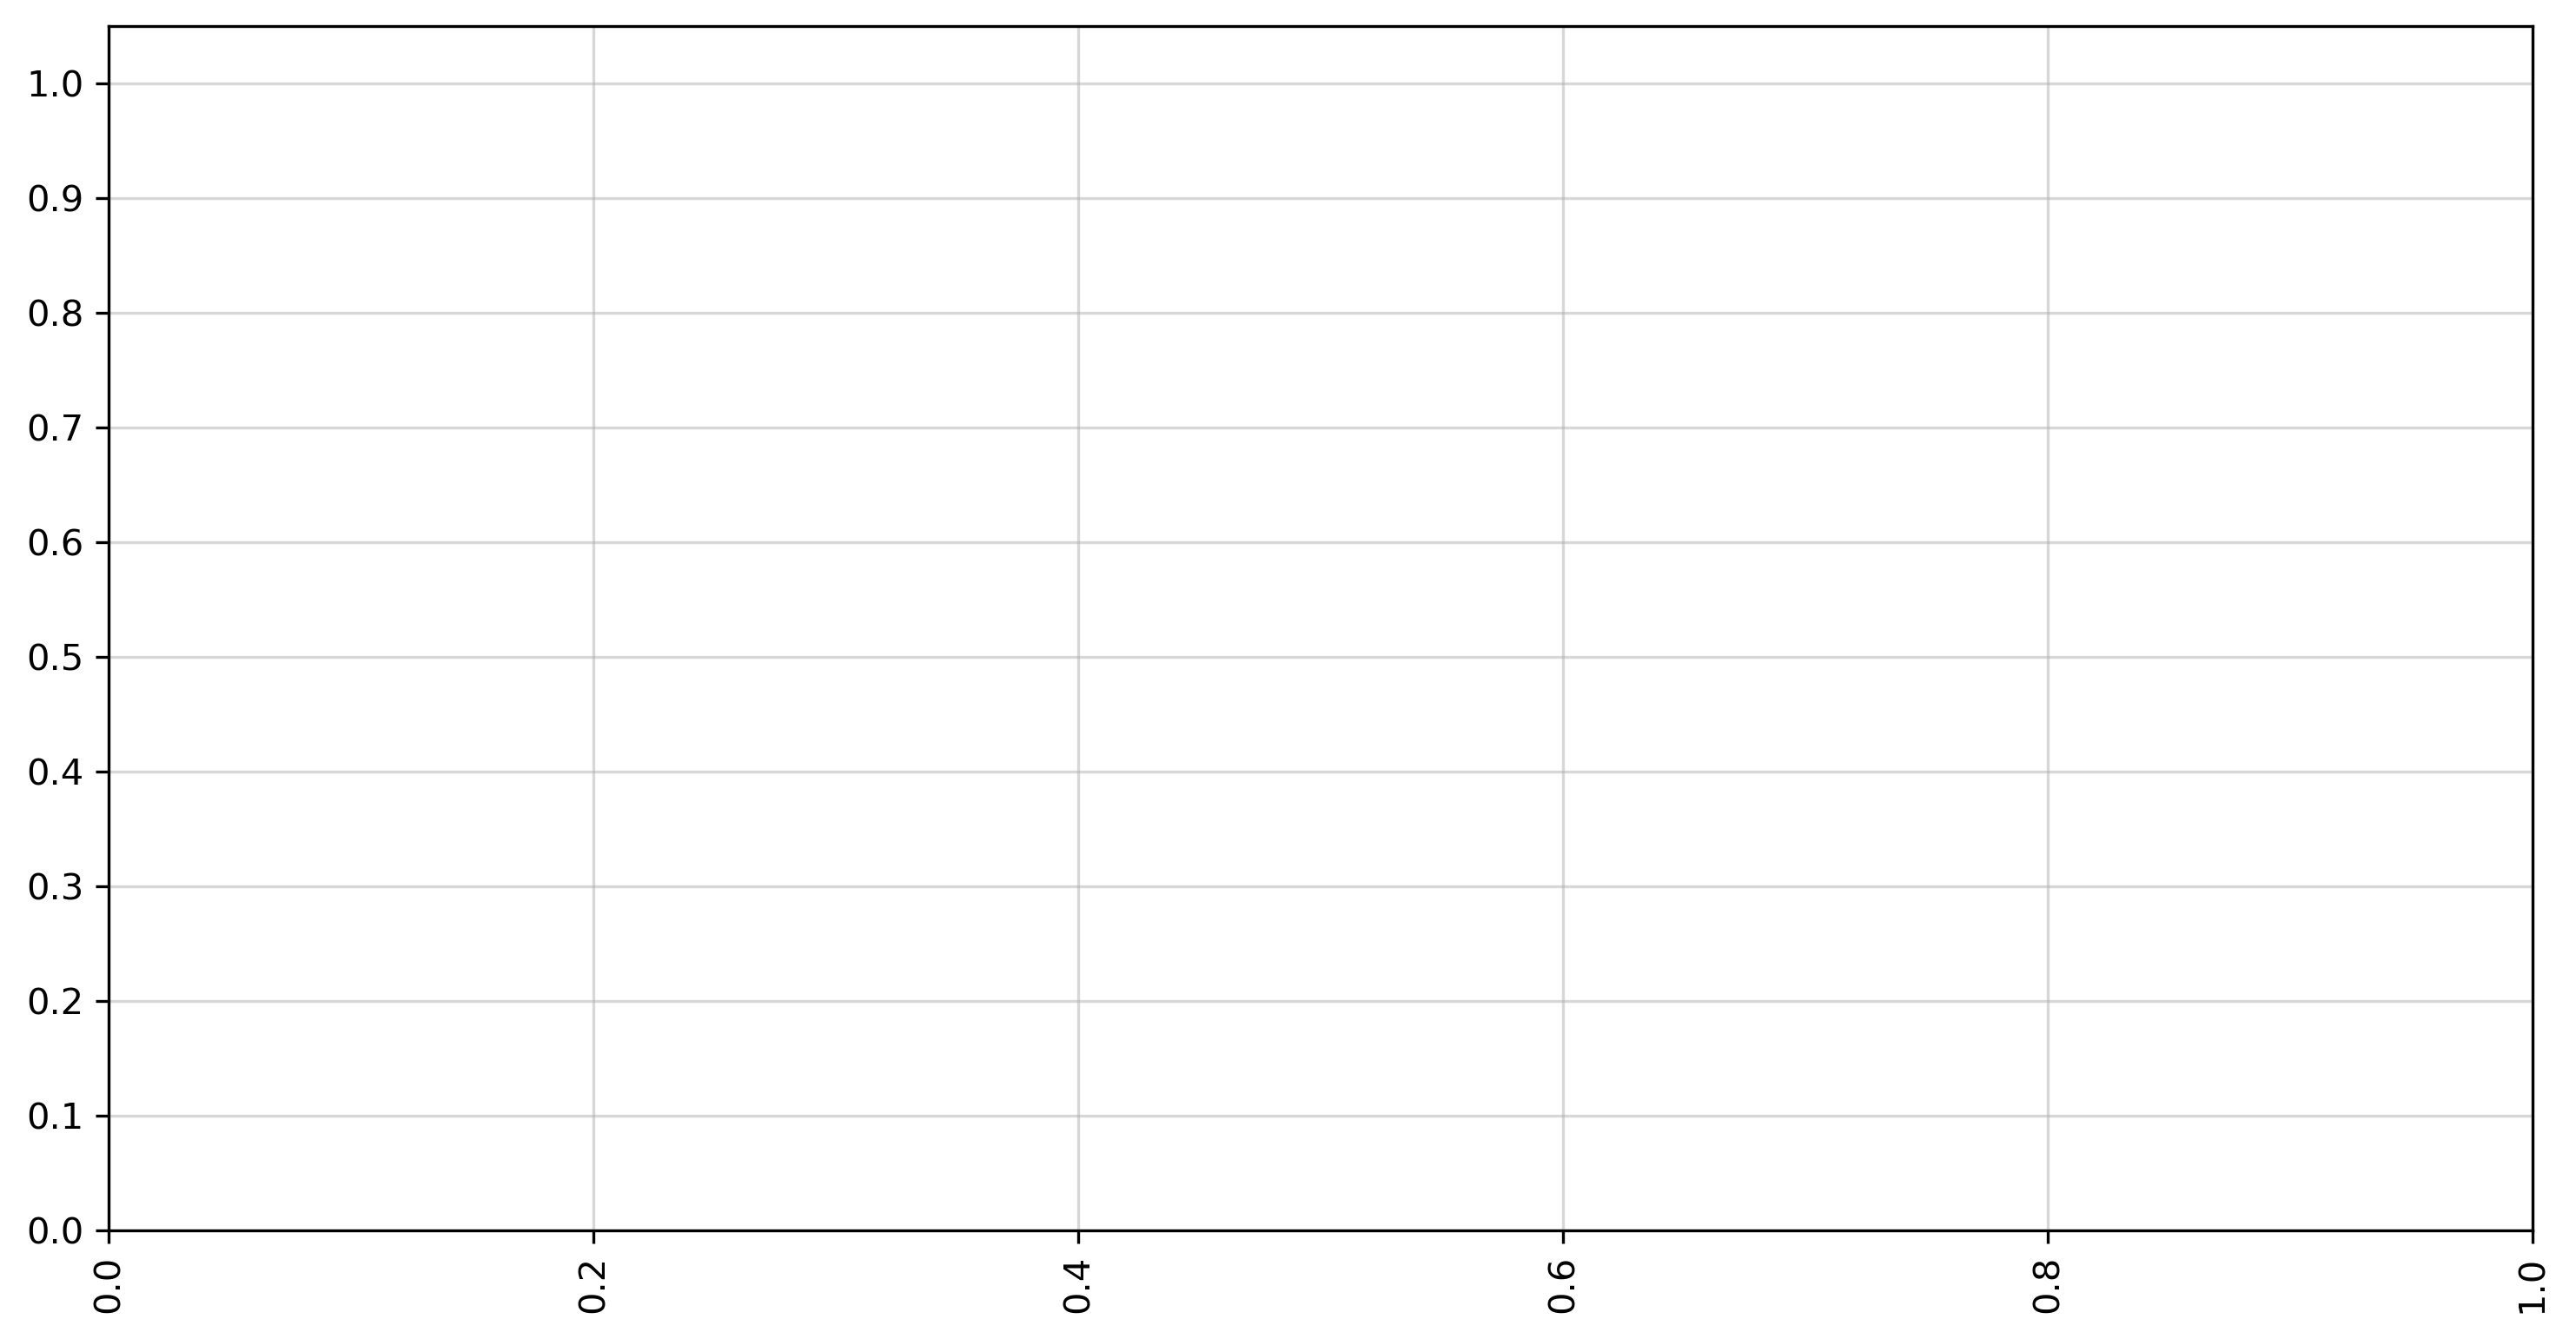

In [25]:
plot_results_long(
    df_results_long=df_results_long,
    output_folder_path=RESULTS_FOLDER,
    test_name=TEST_NAME,
    metrics_include = ["F1 Amino Acid","F1 Sugar"]
)

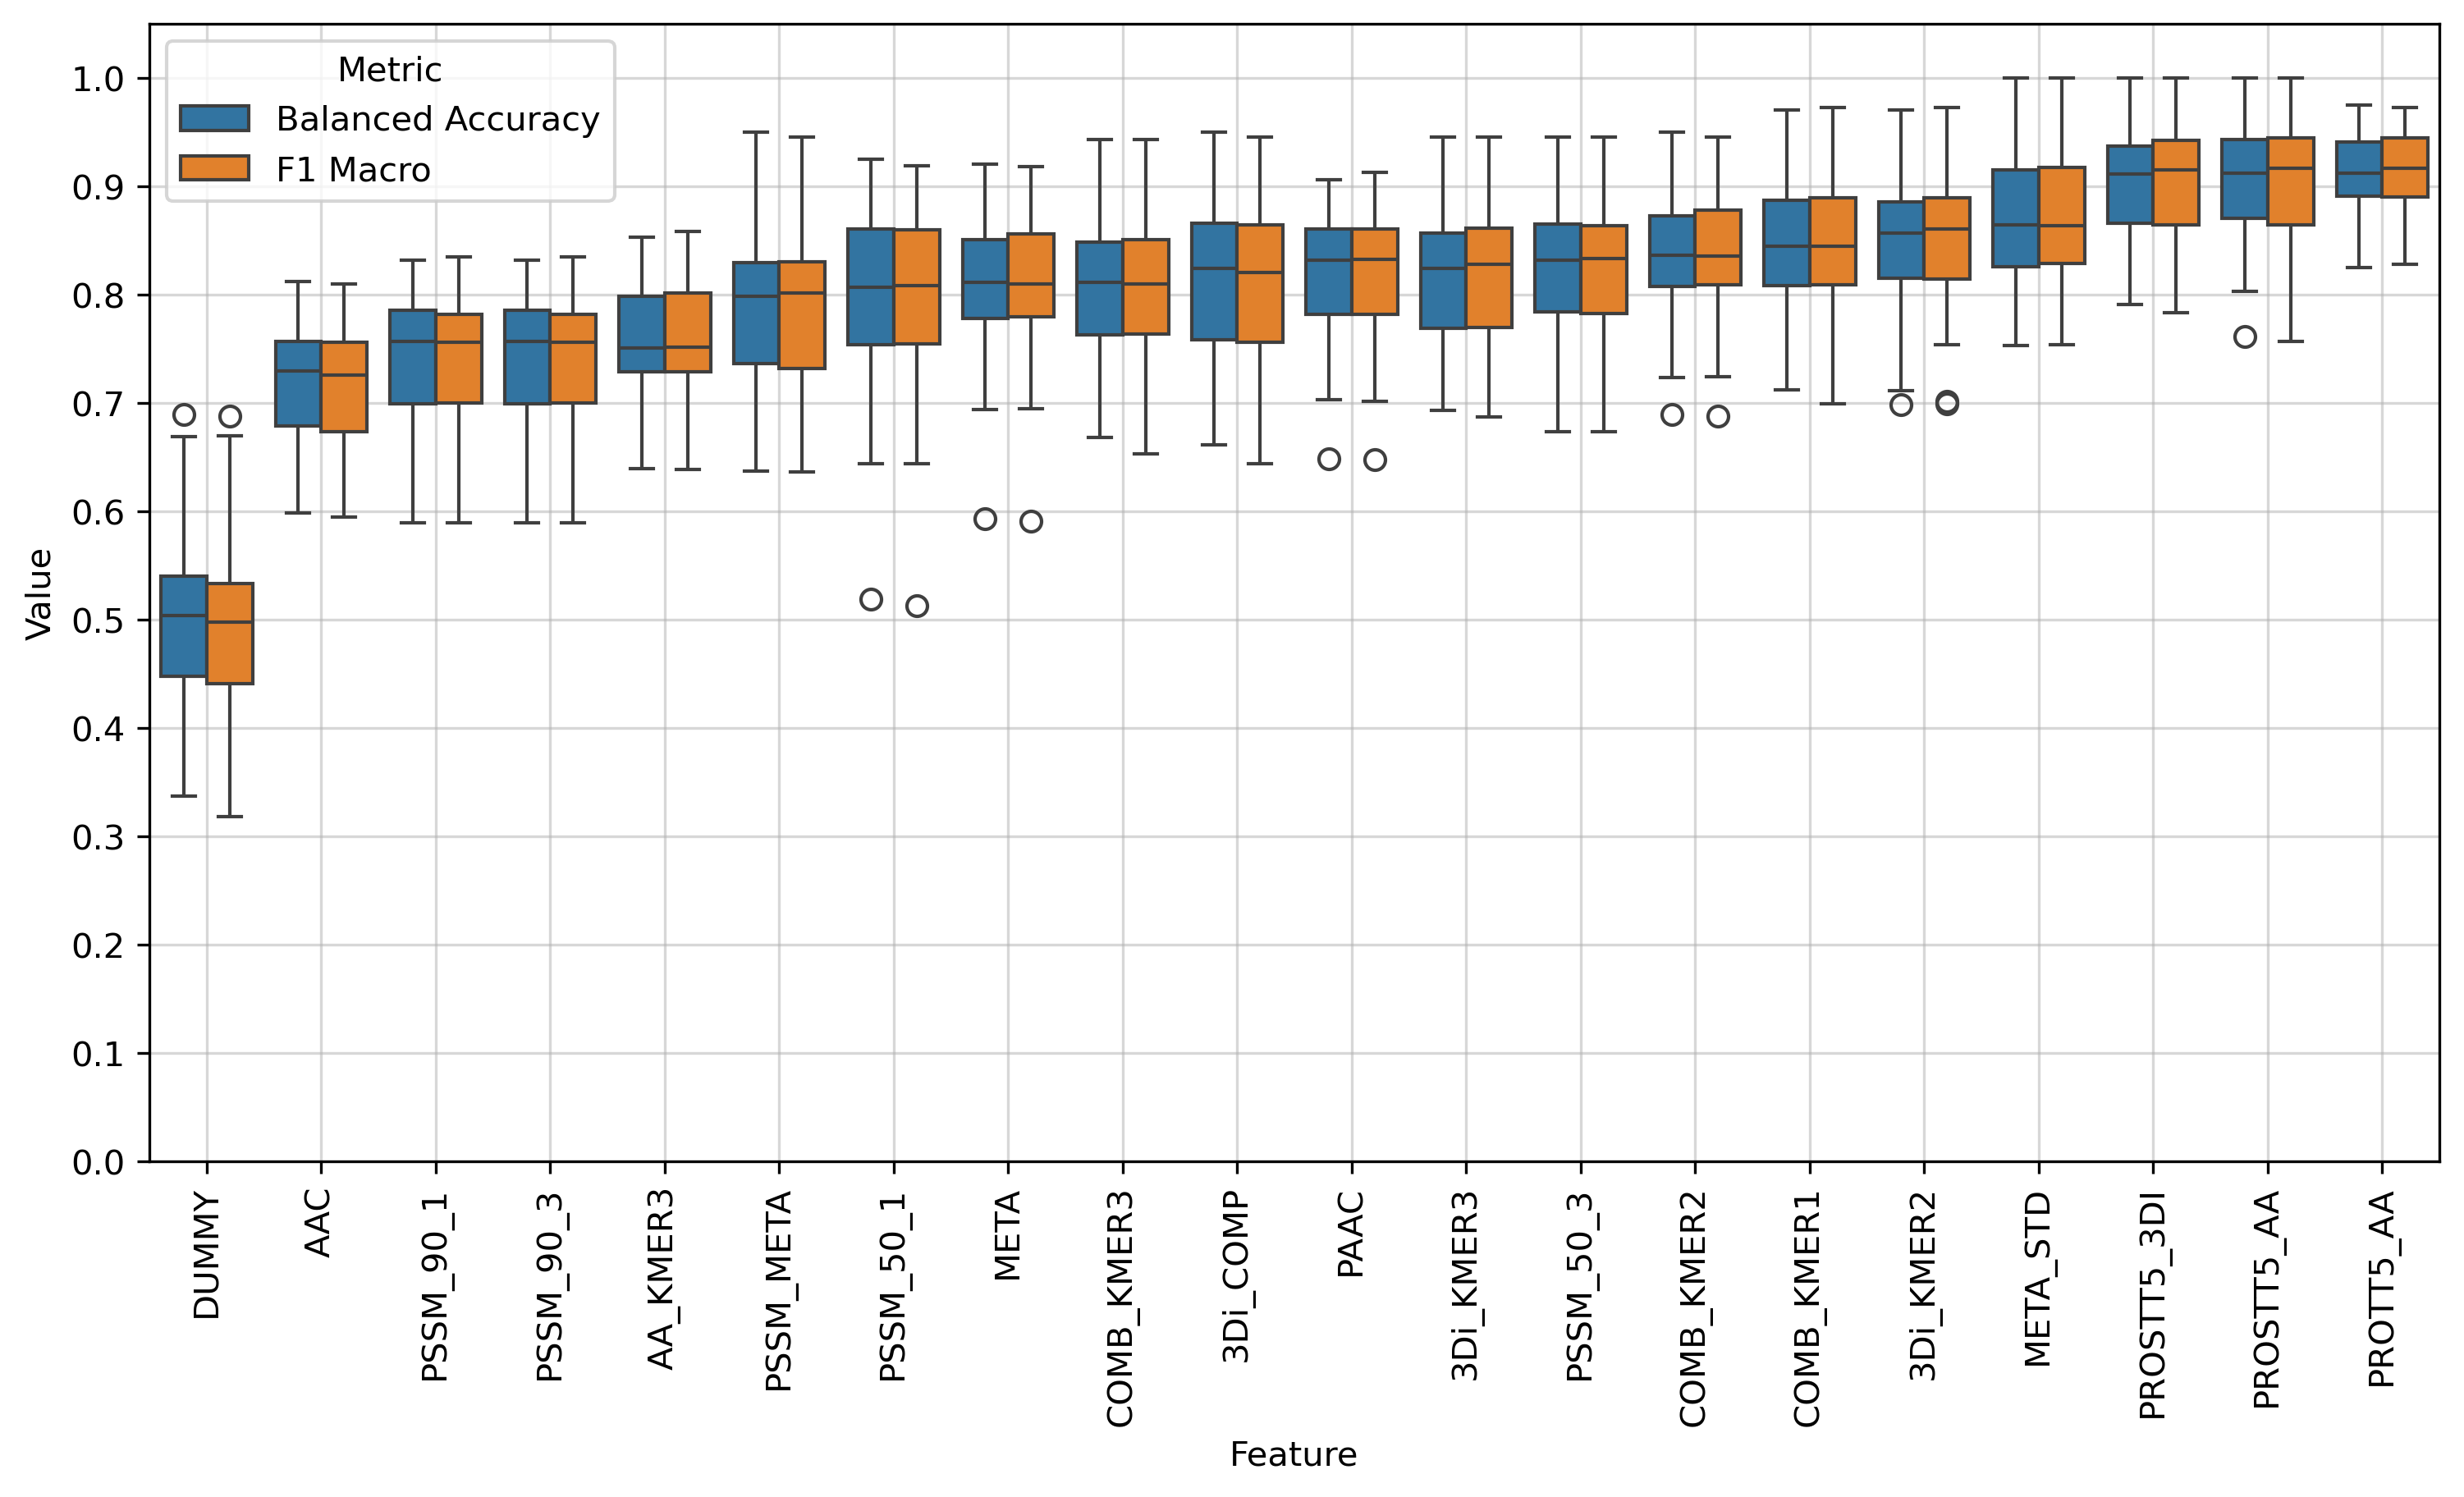

In [26]:
plot_results_long(
    df_results_long=df_results_long,
    output_folder_path=RESULTS_FOLDER,
    test_name=TEST_NAME,
    metrics_include = ["F1 Macro", "Balanced Accuracy"]
)